# Manpower and Promo Cost Analysis on Havaiianas, ION Orchard Singapore

Notebook prepared by Dominic Dayta for Aroodai and Lean Retail Labs

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from statsmodels.genmod.families import Poisson

from scipy import stats

clf = linear_model.PoissonRegressor()

# some basic plot parameters
sns.set_style('darkgrid')
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('font', size = 13)

The following notebook makes use of the cleaned sales dashboard data obtained from the ION Orchard store. Data covers information on daily sales, revenue, profits, conversion and other similar retail statistics every day, from Monday, January 1, 2018, to Sunday, July 29 of the same year.

In [2]:
dashboard_df = pd.read_excel (r'/content/drive/MyDrive/Colab Notebooks/Data Science For Retail/Data Files/Cleaned/dashboard.xls')

dashboard_df.head()

,week_day,date,revenue,units_sold,num_transactions,basket_size,avg_transaction_value,avg_unit_value,total_discount,discount_pct,...,click_collect,online_to_offline_returns,try_non_buy,showroomers,offline_purchase_from_offline_marketing,unnamed_8,price_topseller,compete_price_topseller,compete_num_followers,compete_range_assort
0,Monday,2018-01-01,5668.30,143.0,110.0,1.300000,51.530000,39.638462,100.0,0.017336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tuesday,2018-01-02,2662.10,73.0,61.0,1.196721,43.640984,36.467123,100.0,0.036204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wednesday,2018-01-03,2759.30,74.0,72.0,1.027778,38.323611,37.287838,100.0,0.034974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Thursday,2018-01-04,1784.24,31.0,38.0,0.815789,46.953684,57.556129,100.0,0.053072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Friday,2018-01-05,3375.66,72.0,62.0,1.161290,54.446129,46.884167,100.0,0.028772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Recap of Profit and Revenue Behavior

We recap the following visualization, which appears in our profit analysis of the same Havaianas retail data. We recall the behavior noted in the data that revenue and profit both tend to be highest in the weekends, which also corresponds to days with higher foot traffic, and lowest in the middle of the weekdays, which in turn are low-traffic days.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


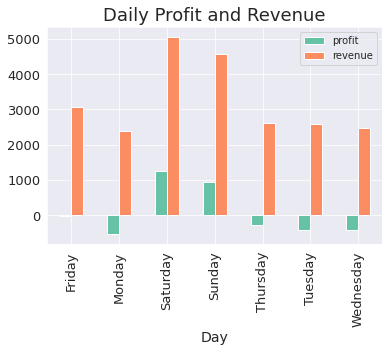

In [3]:
weekday_sales = dashboard_df.groupby('week_day')['revenue','profit','total_discount','visitors','conversion'].mean()

weekday_sales[['profit','revenue']].plot.bar(color = sns.color_palette('Set2'))
plt.title("Daily Profit and Revenue")
plt.xlabel("Day")
plt.show()

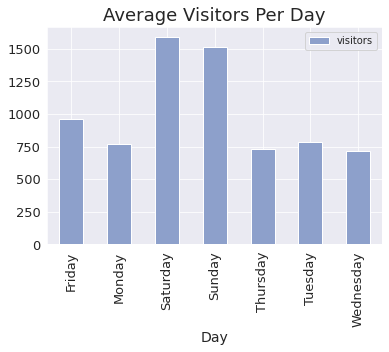

In [4]:
weekday_sales.plot.bar(y = 'visitors', color = sns.color_palette('Set2')[2])
plt.title("Average Visitors Per Day")
plt.xlabel("Day")
plt.show()

## Manpower Cost Analysis

With this information in mind, we note that a possible opportunity for improving our profit situation in the store is to decrease the cost for manpower, especially during low traffic days. Adaptively optimizing manpower cost according to the daily profit potential ensures that we are not wasting manpower cost.

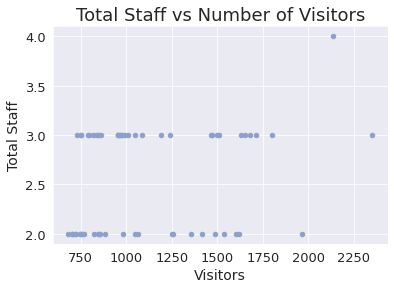

In [7]:
dashboard_df.plot.scatter(x = "visitors", y = "total_staff", color = sns.color_palette('Set2')[2])
plt.title("Total Staff vs Number of Visitors")
plt.ylabel("Total Staff")
plt.xlabel("Visitors")
plt.show()

In general, we find that the total number of staff doesn't change. The number of staff generally stays the same regardless of the foot traffic in the store. We also ese that the the total number of staff doesn't seem to respond in any way to the number of transactions happening at the store.

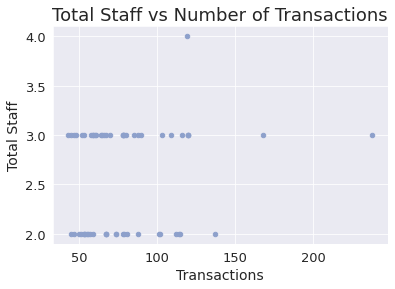

In [8]:
dashboard_df.plot.scatter(x = "num_transactions", y = "total_staff", color = sns.color_palette('Set2')[2])
plt.title("Total Staff vs Number of Transactions")
plt.ylabel("Total Staff")
plt.xlabel("Transactions")
plt.show()

Knowing that there tends to be more visitors in the store during the weekends, we see no corresponding change in the number of staff present in the store on these high traffic days. We are employing as much staff on the weekdays as on the weekends, which is an average of 2.5 to 3.0 people.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


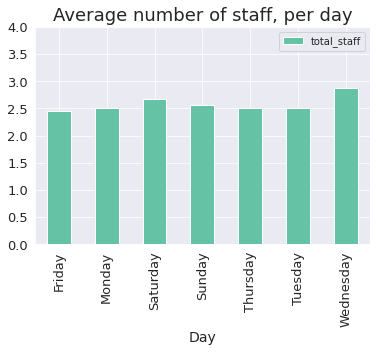

In [12]:
weekday_staff = dashboard_df.groupby('week_day')['total_staff','visitors','num_transactions'].mean()

weekday_staff[['total_staff']].plot.bar(color = sns.color_palette('Set2'),
                                         ylim = [0,4])
plt.title("Average number of staff, per day")
plt.xlabel("Day")
plt.show()

We try to presribe a model for deciding on the number of staff to be employed on the store depending on the foot traffic expected in the store. To do this, we run a Poisson general log-linear model.

In [28]:
regdata =  dashboard_df[['visitors','total_staff']].dropna()

X = regdata.drop(columns=['total_staff'])
y = regdata.drop(columns=['visitors'])

est = sm.GLM(y, X, family = Poisson())
est2 = est.fit()
print(est2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_staff   No. Observations:                   59
Model:                            GLM   Df Residuals:                       58
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92.003
Date:                Mon, 27 Jun 2022   Deviance:                       17.045
Time:                        16:09:31   Pearson chi2:                     18.5
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
visitors       0.0007   6.34e-05     11.294      0.0

The Poisson GLM model describes a loglinear model, where the logarithm of the number of staff to be expected in the store is a function of the day of the week and the number of visitors to be expected in the store on that day. We find that the number of visitors is a significant covariate to this relationship.

A handy way of visualizing this relationship is to look at the prescribed number of staff in the store based on the day of the week as well as the number of visitors on the day.

The following code plots the lines for the expected profit assuming that it is a Monday at the store (the line can easily be re-estimated for any other day).

In [29]:
preds1 = pd.DataFrame({
    'visitors': np.linspace(451, 2480, 300),
    'expected_staff': 0
})

for index, row in preds1.iterrows():
  preds1['expected_staff'][index] = np.floor(np.exp(0.3119 + 0.0005 * row['visitors'] + 0.1850))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


We can see here the impact of our inelastic assignment of manpower in the store. It appears that days with about 500 to 1000 visitors can make do with about 2 staff members, but there are various days at which we were employing 3. At the same time, in excess of 2000 visitors, we may be needing more staff but on some days are employing 2 or 3.

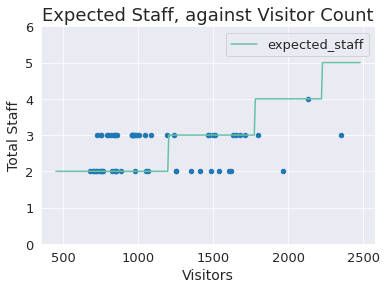

In [60]:
ax = preds1.plot(x = 'visitors', y= ['expected_staff'], ylim = [0,6], 
           color = sns.color_palette('Set2'))
dashboard_df.plot(x='visitors', y = ['total_staff'], kind = 'scatter', ax=ax)

plt.title("Expected Staff, against Visitor Count")
plt.xlabel("Visitors")
plt.ylabel("Total Staff")
plt.show()

It should be brought up that this analysis can be further improved by taking into account information like budgets, actual need, and a lot more data on the number of staff employed. This very basic analysis ignores some important facts of manpower and hiring, but nonetheless presents a useful outline for how we can, in the future, optimize manpower to improve costs.

Assuming each staff gets 8 hours of work, and a fixed base pay per hour of 20 SGD, then the total amount spent on manpower alone in the present situation are as follows:

In [36]:
np.sum(regdata["total_staff"] * 6 * 20)

18240.0

On the other hand, following our optimized method for assigning manpower:

In [50]:
regdata["total_staff2"] = 0
regdata["total_staff3"] = 0

for index, row in regdata.iterrows():
  regdata['total_staff2'][index] = np.floor(np.exp(0.3119 + 0.0005 * row['visitors'] + 0.1850))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [56]:
np.sum(regdata["total_staff2"] * 6 * 20)

17280

This is further improved if we impose certain limitations. For instance, supopse that the store never needs any more than 4 people in its staff.

In [53]:
for index, row in regdata.iterrows():
  regdata['total_staff3'][index] = np.min([row['total_staff2'],4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
np.sum(regdata["total_staff3"] * 6 * 20)

17160

## Discount Analysis

Another major cost that appears in the data is the application of discounts, which bleeds into the revenue that the store receives. Consider, for instance, the following plot, which shows discount behavior not exactly following a discernible pattern.

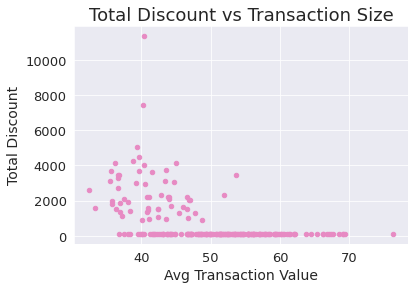

In [68]:
dashboard_df.plot.scatter(x = "avg_transaction_value", y = "total_discount", color = sns.color_palette('Set2')[3])
plt.title("Total Discount vs Transaction Size")
plt.xlabel("Avg Transaction Value")
plt.ylabel("Total Discount")
plt.show()

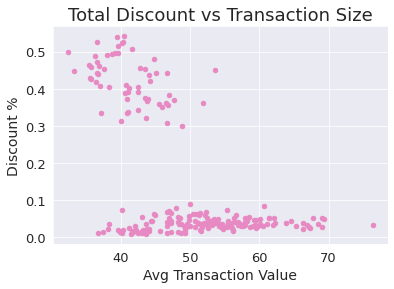

In [69]:
dashboard_df.plot.scatter(x = "avg_transaction_value", y = "discount_pct", color = sns.color_palette('Set2')[3])
plt.title("Total Discount vs Transaction Size")
plt.xlabel("Avg Transaction Value")
plt.ylabel("Discount %")
plt.show()

The clustering that's happening in the data cannot currently be attributed to anything else that's present in the data. However, it seems that the discount at the upper cluster are simply uncontrolled application of discounts.

If we take this assumption, the bottom portion of the plot reveals a useful model for how discounting should be applied.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


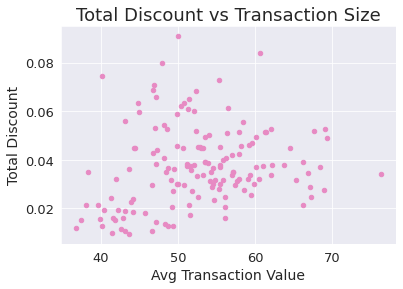

In [74]:
dash2 = dashboard_df[dashboard_df["discount_pct"] <= 0.1]
dash2["discount_pct2"] = np.log(dash2["discount_pct"] / (0.2 - dash2["discount_pct"]))
dash2.plot.scatter(x = "avg_transaction_value", y = "discount_pct", color = sns.color_palette('Set2')[3])

plt.title("Total Discount vs Transaction Size")
plt.xlabel("Avg Transaction Value")
plt.ylabel("Total Discount")
plt.show()

It is possible to create a model with an assumed restriction on the size of the discount provided by the store. Suppose that we control all discounts to a maximum of 20% of the total transaction value (revenue + discount given).

The following regression model gives the discount (between 0% to 20% depending on the day of the week (to account for conversion rate, number of visitors) and the average transaction value expected for the day:

$$
\log\left(\frac{p}{0.2 - p}\right) = \alpha + \beta_1 (\text{avg transaction value}) + \beta_2 (\text{weekday})
$$

In [87]:
regdata2 =  dash2[['avg_transaction_value','discount_pct2']].dropna()

X = regdata2.drop(columns=['discount_pct2'])
y = regdata2.drop(columns=['avg_transaction_value'])

X2 = sm.add_constant(X)

est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          discount_pct2   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.28
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           0.000228
Time:                        16:52:13   Log-Likelihood:                -124.06
No. Observations:                 150   AIC:                             252.1
Df Residuals:                     148   BIC:                             258.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.74

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Because the dependent variable is a transformed version of the actual percentages, it will be much more handy to look into the prescribed discount percentage as the average transaction value in a given day increases.

In [113]:
preds2 = pd.DataFrame({
    'avg_transaction_value': np.linspace(32.40247, 500, 300),
    'discount_pct2': 0.00000
})

for index, row in preds2.iterrows():
  z = -2.7416 + 0.0223 * row['avg_transaction_value']
  preds2['discount_pct2'][index] = 0.2 / (1 + np.exp(-1 * z))

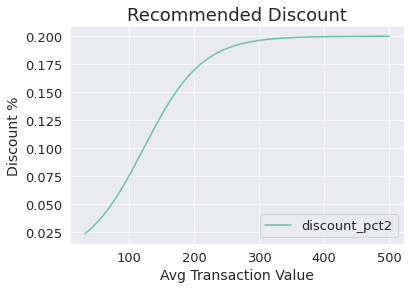

In [116]:
preds2.plot(x = 'avg_transaction_value', y= "discount_pct2",
           color = sns.color_palette('Set2'))

plt.title("Recommended Discount")
plt.xlabel("Avg Transaction Value")
plt.ylabel("Discount %")
plt.show()

We find that generally, a discount of up to 7.5% only are recommended for transaction values less than 100 SGD. Meanwhile,  transactions of up to 200 SGD average may be given discounts of up to 17.5%. However, notice that the assumption of a maximum 20% discount in the model assures  that even when the transaction value is upwards of 500 SGD, the store is still only expecting a maximum discount percentage of 20%.

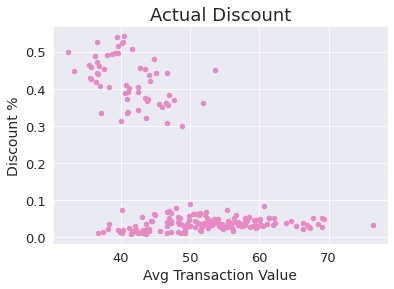

In [126]:
dashboard_df.plot.scatter(x = 'avg_transaction_value', y= "discount_pct",
           color = sns.color_palette('Set2')[3])

plt.title("Actual Discount")
plt.xlabel("Avg Transaction Value")
plt.ylabel("Discount %")
plt.show()

And of course this recommendation compares dismally when looking into the actual discounts given to customers. In the data, we find many transactions whose average values were at 50 SGD yet receiving discounts of up to 50%.

In [117]:
dashboard_df["discount_pct3"] = 0.0000

for index, row in preds2.iterrows():
  z = -2.7416 + 0.0223 * row['avg_transaction_value']
  dashboard_df['discount_pct3'][index] = 0.2 / (1 + np.exp(-1 * z))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


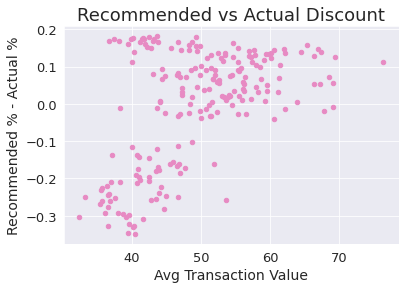

In [123]:
dashboard_df["discount_pct_diff"] = dashboard_df["discount_pct3"] - dashboard_df["discount_pct"]
dashboard_df.plot.scatter(x = 'avg_transaction_value', y= "discount_pct_diff",
           color = sns.color_palette('Set2')[3])

plt.title("Recommended vs Actual Discount")
plt.xlabel("Avg Transaction Value")
plt.ylabel("Recommended % - Actual %")
plt.show()

Another way of looking at the data is to compare the recommended vs actual percentage discount given for the day. In this plot, we are looking at two possible values: a positive difference means that the actual discount given was much lower than the recommended discount, which isn't a big problem given that this does not translate to losses on the part of the store.

However, what's much more important is to consider days in the negative difference, which suggests actual percentage discounts that were disproportionately larger than the actual discount given for a given day. The differnce could be as high as 30%. These are major losses that are to be shouldered by the store.

In [129]:
np.mean(1 * dashboard_df["discount_pct_diff"] < 0)

0.37850467289719625

A quick calculation shows that there are nearly 38% such transactions in the data, meaning that more than a quarter of the records had discounts that were disproportionately higher than what was recommended for the day.

Like most of the analysis presented thus far, this comes with a major weakness that we are performing the analysis without visibility of whatever major promos or discount strategies were being conducted on the day. However, the model nevertheless demonstrates a way by which we can actively promo activity in a given day such that we are never performing what should be customer converting activities to the extent that they begin bleeding into our profits.

Taken alongside our analysis of manpower costing, we can greatly take advantage of these kinds of models to optimize costs and, in consequence, profits in the stores.